In [2]:
import pandas as pd
import pycountry 
import time
import re
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt


<h1><center> Cleanning : 

In [3]:
df = pd.read_csv('opportunites_demploi.csv', encoding='iso-8859-1')

In [4]:
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirment of the company   3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


In [6]:
df.duplicated().sum()

202

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isna().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              228
Salary                        172
Requirment of the company       0
Facilities                      0
dtype: int64

In [9]:
# change the valeure monquante :
df['Experience level'].fillna('No info ', inplace=True)
df['Salary'].fillna(0, inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
# to lower case :
df['Job Title'] = df['Job Title'].str.lower()
df['Location'] = df['Location'].str.lower()
df['Requirment of the company '] = df['Requirment of the company '].str.lower()

#### Salary :

In [12]:
import re

def convert_to_dig(txt):
    if txt != 0  :
        power = 1
        if 'GBP' in txt:
            power *= 1.29
        if 'EUR' in txt:
            power *= 1.16
        
        # Extract the number using regex and convert it to an integer
        num_str = re.sub(r'[^\d]', '', txt)
        num = int(num_str) if num_str.isdigit() else 0
        
        return num * 1000 * power
    else :
        return txt


In [13]:
# add the minument salary column :
df['minimum_Salary'] =  df['Salary'].apply(convert_to_dig)

In [14]:
# Ajouter salary asterisk :
asterisk = lambda salary: True if salary != 0 and '*' in salary else False

df['asterisk'] = df['Salary'].apply(asterisk)

#### Requirment of the company :

In [15]:
# change column to list :
df['Requirment of the company '] = df['Requirment of the company '].str.split(',')

#### Location :

In [16]:
country_list = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
country_list = [country.lower() for country in country_list]

country_code = {"AF":"Afghanistan",
"AX":"Aland Islands",
"AL":"Albania",
"DZ":"Algeria",
"AS":"American Samoa",
"AD":"Andorra",
"AO":"Angola",
"AI":"Anguilla",
"AQ":"Antarctica",
"AG":"Antigua and Barbuda",
"AR":"Argentina",
"AM":"Armenia",
"AW":"Aruba",
"AU":"Australia",
"AT":"Austria",
"AZ":"Azerbaijan",
"BS":"Bahamas",
"BH":"Bahrain",
"BD":"Bangladesh",
"BB":"Barbados",
"BY":"Belarus",
"BE":"Belgium",
"BZ":"Belize",
"BJ":"Benin",
"BM":"Bermuda",
"BT":"Bhutan",
"BO":"Bolivia, Plurinational State of",
"BQ":"Bonaire, Sint Eustatius and Saba",
"BA":"Bosnia and Herzegovina",
"BW":"Botswana",
"BV":"Bouvet Island",
"BR":"Brazil",
"IO":"British Indian Ocean Territory",
"BN":"Brunei Darussalam",
"BG":"Bulgaria",
"BF":"Burkina Faso",
"BI":"Burundi",
"KH":"Cambodia",
"CM":"Cameroon",
"CA":"Canada",
"CV":"Cape Verde",
"KY":"Cayman Islands",
"CF":"Central African Republic",
"TD":"Chad",
"CL":"Chile",
"CN":"China",
"CX":"Christmas Island",
"CC":"Cocos (Keeling) Islands",
"CO":"Colombia",
"KM":"Comoros",
"CG":"Congo",
"CD":"Congo, The Democratic Republic of the",
"CK":"Cook Islands",
"CR":"Costa Rica",
"CI":"Côte d'Ivoire",
"HR":"Croatia",
"CU":"Cuba",
"CW":"Curaçao",
"CY":"Cyprus",
"CZ":"Czech Republic",
"DK":"Denmark",
"DJ":"Djibouti",
"DM":"Dominica",
"DO":"Dominican Republic",
"EC":"Ecuador",
"EG":"Egypt",
"SV":"El Salvador",
"GQ":"Equatorial Guinea",
"ER":"Eritrea",
"EE":"Estonia",
"ET":"Ethiopia",
"FK":"Falkland Islands (Malvinas)",
"FO":"Faroe Islands",
"FJ":"Fiji",
"FI":"Finland",
"FR":"France",
"GF":"French Guiana",
"PF":"French Polynesia",
"TF":"French Southern Territories",
"GA":"Gabon",
"GM":"Gambia",
"GE":"Georgia",
"DE":"Germany",
"GH":"Ghana",
"GI":"Gibraltar",
"GR":"Greece",
"GL":"Greenland",
"GD":"Grenada",
"GP":"Guadeloupe",
"GU":"Guam",
"GT":"Guatemala",
"GG":"Guernsey",
"GN":"Guinea",
"GW":"Guinea-Bissau",
"GY":"Guyana",
"HT":"Haiti",
"HM":"Heard Island and McDonald Islands",
"VA":"Holy See (Vatican City State)",
"HN":"Honduras",
"HK":"Hong Kong",
"HU":"Hungary",
"IS":"Iceland",
"IN":"India",
"ID":"Indonesia",
"IR":"Iran, Islamic Republic of",
"IQ":"Iraq",
"IE":"Ireland",
"IM":"Isle of Man",
"IL":"Israel",
"IT":"Italy",
"JM":"Jamaica",
"JP":"Japan",
"JE":"Jersey",
"JO":"Jordan",
"KZ":"Kazakhstan",
"KE":"Kenya",
"KI":"Kiribati",
"KP":"Korea, Democratic People's Republic of",
"KR":"Korea, Republic of",
"KW":"Kuwait",
"KG":"Kyrgyzstan",
"LA":"Lao People's Democratic Republic",
"LV":"Latvia",
"LB":"Lebanon",
"LS":"Lesotho",
"LR":"Liberia",
"LY":"Libya",
"LI":"Liechtenstein",
"LT":"Lithuania",
"LU":"Luxembourg",
"MO":"Macao",
"MK":"Macedonia, Republic of",
"MG":"Madagascar",
"MW":"Malawi",
"MY":"Malaysia",
"MV":"Maldives",
"ML":"Mali",
"MT":"Malta",
"MH":"Marshall Islands",
"MQ":"Martinique",
"MR":"Mauritania",
"MU":"Mauritius",
"YT":"Mayotte",
"MX":"Mexico",
"FM":"Micronesia, Federated States of",
"MD":"Moldova, Republic of",
"MC":"Monaco",
"MN":"Mongolia",
"ME":"Montenegro",
"MS":"Montserrat",
"MA":"Morocco",
"MZ":"Mozambique",
"MM":"Myanmar",
"NA":"Namibia",
"NR":"Nauru",
"NP":"Nepal",
"NL":"Netherlands",
"NC":"New Caledonia",
"NZ":"New Zealand",
"NI":"Nicaragua",
"NE":"Niger",
"NG":"Nigeria",
"NU":"Niue",
"NF":"Norfolk Island",
"MP":"Northern Mariana Islands",
"NO":"Norway",
"OM":"Oman",
"PK":"Pakistan",
"PW":"Palau",
"PS":"Palestinian Territory, Occupied",
"PA":"Panama",
"PG":"Papua New Guinea",
"PY":"Paraguay",
"PE":"Peru",
"PH":"Philippines",
"PN":"Pitcairn",
"PL":"Poland",
"PT":"Portugal",
"PR":"Puerto Rico",
"QA":"Qatar",
"RE":"Réunion",
"RO":"Romania",
"RU":"Russian Federation",
"RW":"Rwanda",
"BL":"Saint Barthélemy",
"SH":"Saint Helena, Ascension and Tristan da Cunha",
"KN":"Saint Kitts and Nevis",
"LC":"Saint Lucia",
"MF":"Saint Martin (French part)",
"PM":"Saint Pierre and Miquelon",
"VC":"Saint Vincent and the Grenadines",
"WS":"Samoa",
"SM":"San Marino",
"ST":"Sao Tome and Principe",
"SA":"Saudi Arabia",
"SN":"Senegal",
"RS":"Serbia",
"SC":"Seychelles",
"SL":"Sierra Leone",
"SG":"Singapore",
"SX":"Sint Maarten (Dutch part)",
"SK":"Slovakia",
"SI":"Slovenia",
"SB":"Solomon Islands",
"SO":"Somalia",
"ZA":"South Africa",
"GS":"South Georgia and the South Sandwich Islands",
"ES":"Spain",
"LK":"Sri Lanka",
"SD":"Sudan",
"SR":"Suriname",
"SS":"South Sudan",
"SJ":"Svalbard and Jan Mayen",
"SZ":"Swaziland",
"SE":"Sweden",
"CH":"Switzerland",
"SY":"Syrian Arab Republic",
"TW":"Taiwan, Province of China",
"TJ":"Tajikistan",
"TZ":"Tanzania, United Republic of",
"TH":"Thailand",
"TL":"Timor-Leste",
"TG":"Togo",
"TK":"Tokelau",
"TO":"Tonga",
"TT":"Trinidad and Tobago",
"TN":"Tunisia",
"TR":"Turkey",
"TM":"Turkmenistan",
"TC":"Turks and Caicos Islands",
"TV":"Tuvalu",
"UG":"Uganda",
"UA":"Ukraine",
"AE":"United Arab Emirates",
"GB":"United Kingdom",
"US":"United States",
"UM":"United States Minor Outlying Islands",
"UY":"Uruguay",
"UZ":"Uzbekistan",
"VU":"Vanuatu",
"VE":"Venezuela, Bolivarian Republic of",
"VN":"Viet Nam",
"VG":"Virgin Islands, British",
"VI":"Virgin Islands, U.S.",
"WF":"Wallis and Futuna",
"YE":"Yemen",
"ZM":"Zambia",
"ZW":"Zimbabwe"}

In [17]:
# Clean and normalize columns location function : :
def fixi_Location(input_string):

    input_string = str(input_string)
    hyphen_pattern = r"-"
    # Use re.sub() to replace hyphens with commas
    replaced_string = re.sub(hyphen_pattern, ",", input_string)
    # Define the regular expression pattern to match numbers and special characters
    pattern = r"[^a-zA-Z, -]"
    
    # Use re.sub() to replace matched characters with an empty string
    cleaned_string = re.sub(pattern, "", replaced_string)
    cleaned_string = cleaned_string.split(',')
    cleaned_string = [item.strip() for item in cleaned_string if item.strip()]
    return cleaned_string    


In [18]:
df['Location'] = df['Location'].apply(fixi_Location)

In [19]:
# show how to look :
locition = df['Location'].tolist()
for i in locition :
    print(fixi_Location(i))

['richardson', 'tx', 'united states']
['ebne', 'mauritius']
['south jordan', 'ut', 'united states']
['nonantola', 'italy']
['arlington', 'va', 'united states']
['kirkland', 'washington', 'united states']
['porto', 'portugal']
['bangkok', 'thailand']
['san jose', 'ca', 'united states']
['santa clara', 'ca', 'united states']
['geneva', 'switzerland']
['toronto', 'on', 'canada']
['mumbai', 'india']
['braga', 'portugal']
['gerlingen', 'germany']
['kirkland', 'washington', 'united states']
['united states', 'aliso viejo', 'ca']
['sydney', 'new south wales', 'australia']
['braga']
['remote job']
['tallinn']
['bengaluru', 'india']
['mlaga', 'spain']
['plymouth', 'mi', 'united states']
['remote worldwide']
['houston', 'tx', 'united states']
['saint', 'herblain', 'france']
['new york city', 'united states']
['mexico city', 'mexico']
['so paulo', 'state of so paulo', 'brazil']
['poland or eastern europe remote']
['batu kawan', 'malaysia']
['lehi', 'utah', 'open to remote']
['barcelona', 'spain']

In [20]:
# function to find country :

def get_country(list_adress) :
    for i in list_adress :
        i = i.lower()
        if i in country_list :
            return i
        
    for i in list_adress :
        if i.upper() in country_code :
            return country_code[i.upper()]
    for i in list_adress :
        if 'remote' in i :
            return 'remote'
        
    for i in list_adress :
        # find with alpha_3 :
        country_alpha3 = pycountry.countries.get(alpha_3=i)
        if country_alpha3 :
            return country_alpha3.name
        
    for i in list_adress :
        # find country by city :
        geolocator = Nominatim(user_agent="city_country_app")
        try:
            location = geolocator.geocode(i, language="en", timeout=10)
            if location:
                return location.address.split(",")[-1].strip()
        except GeocoderTimedOut :
            # Retry after a short delay.
            time.sleep(5)
            continue

    return list_adress

get_country(['redmote','bidan','cadd','phidlippines','usba'])

'Iraq'

In [21]:
df['Country'] = df['Location'].apply(get_country)

In [22]:
df['Country'] = df['Country'].str.lower()

In [23]:
for i in df['Country'].tolist() :
    print(i)

united states
mauritius
united states
italy
united states
united states
portugal
thailand
united states
united states
switzerland
canada
india
portugal
germany
united states
united states
australia
portugal
remote
estonia
india
spain
united states
remote
united states
france
united states
mexico
brazil
remote
malaysia
remote
spain
canada
poland
united states
argentina
united states
india
india
germany
argentina
united states
austria
remote
united states
remote
belgium
india
remote
united states
remote
canada
united states
united kingdom
remote
brazil
united kingdom
united states
united states
mauritius
united states
united states
india
remote
ukraine
united states
united kingdom
canada
united states
united kingdom
united states
united states
canada
spain
united arab emirates
australia
united states
united states
germany
canada
south africa
costa rica
united states
united kingdom
united states
remote
united states
costa rica
canada
france
united states
united states
belgium
canada
unite

#### Job Title	:

In [24]:
df

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,minimum_Salary,asterisk,Country
0,SGS,clinical data analyst,"[richardson, tx, united states]",Full Time,Entry-level,48K+ *,"[computer science, data quality, genetics, mat...",",,,,",48000.0,True,united states
1,Ocorian,aml/cft & data analyst,"[ebne, mauritius]",Full Time,Entry-level,48K+ *,"[agile, data management, finance, security, , ]",",,,,",48000.0,True,mauritius
2,Cricut,machine learning engineer,"[south jordan, ut, united states]",Full Time,No info,90K+ *,"[agile, architecture, aws, computer science, c...","Career development,,,,",90000.0,True,united states
3,Bosch Group,application developer & data analyst,"[nonantola, italy]",Full Time,Entry-level,48K+ *,"[engineering, industrial, oracle, power bi, r,...",",,,,",48000.0,True,italy
4,Publicis Groupe,data engineer full time (public sector) usa,"[arlington, va, united states]",Full Time,Mid-level,108K+,"[aws, azure, computer science, consulting, dat...","Flex hours,Flex vacation,Parental leave,Unlimi...",108000.0,False,united states
...,...,...,...,...,...,...,...,...,...,...,...
3190,CCRi,"application integration engineer, computer vis...","[chantilly, virginia, united states]",Full Time,Mid-level,113K+,"[agile, angular, apis, architecture, aws, azure]","401(k) matching,Career development,Flex hours,...",113000.0,False,united states
3191,Publicis Groupe,"associate director, data science","[new york city, united states]",Full Time,Mid-level,106K+,"[bayesian, classification, clustering, data an...","Career development,Health care,,,",106000.0,False,united states
3192,DoorDash,"senior software engineer, machine learning - a...","[sunnyvale, ca san francisco, ca new york]",Full Time,Senior-level,176K+,"[computer science, data analysis, engineering,...","401(k) matching,Career development,Equity,Insu...",176000.0,False,united states
3193,Western Digital,data scientist - new college graduate,"[bian, philippines]",Full Time,Entry-level,39K+ *,"[apis, clustering, computer science, data visu...","Career development,,,,",39000.0,True,philippines


In [25]:
list_job = df['Job Title'].value_counts().index.tolist()
len(list_job)

2129

In [26]:
# my origine code :
def find_job_role(job_title) :

    job_rool = {
        'IA' : ['ai','artificial','intelligence','ml','machine','learning'],
        'data scientist' : ['data','scientist','scient','science'],
        'big data' : ['big data','big','bi'],
        'data Analyste' : ['analyst','data','analytics'],
        'data engineer' : ['data','engineer']
    }

    a,b,c,d,e = 0,0,0,0,0

    for sub_ia in job_rool['IA'] :
        if sub_ia in job_title :
            a +=1

    for sub_scin in job_rool['data scientist'] :
        if sub_scin in job_title :
            b +=1

    for sub_bd in job_rool['big data'] :
        if sub_bd in job_title :
            c +=1

    for sub_DA in job_rool['data Analyste'] :
        if sub_DA in job_title :
            d +=1

    for sub_DE in job_rool['data engineer'] :
        if sub_DE in job_title :
            e +=1

    max = sorted([a,b,c,d,e], reverse=True)

    if sum(max) != 0 :
    
        if a == max[0]  :
            return 'IA'
        
        if b == max[0] :
            return 'data scientist'
        
        if c == max[0] :
            return 'big data'
        
        if d == max[0] :
            return 'data Analyste'

        if e == max[0] :
            return 'data engineer'
    return 'other'

find_job_role('data engineer')

'data engineer'

In [27]:
# function rusumer :
def find_job_role(job_title):
    job_roles = {
        'IA': ['ai', 'artificial', 'intelligence', 'ml', 'machine', 'learning'],
        'data scientist': ['data', 'scientist', 'scient', 'science'],
        'big data': ['big data', 'big', 'bi'],
        'data Analyste': ['analyst', 'data', 'analytics'],
        'data engineer': ['data', 'engineer']
    }

    max_count = 0
    matched_role = 'other'

    for role, keywords in job_roles.items():
        count = sum(1 for keyword in keywords if keyword in job_title)
        if count > max_count:
            max_count = count
            matched_role = role
            
    return matched_role

# Example usage
print(find_job_role('data engineer'))

data engineer


In [28]:
df['job role'] = df['Job Title'].apply(find_job_role)

### Facilities :

In [29]:
def fixe_Facilities(my_list) :
    my_list = my_list.strip(",")

    if my_list == '' :
        return 'No Facilities'
    else :
        return my_list.split(',')

df['Facilities'] = df['Facilities'].apply(fixe_Facilities)

In [30]:
df.head(1)

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirment of the company,Facilities,minimum_Salary,asterisk,Country,job role
0,SGS,clinical data analyst,"[richardson, tx, united states]",Full Time,Entry-level,48K+ *,"[computer science, data quality, genetics, mat...",No Facilities,48000.0,True,united states,data Analyste


<h1><center>  Analyse approfondie du marché du travail :</center>


In [31]:
Analyse_df = df.drop(['Location'], axis=1)
Analyse_df.head(1)

,Company,Job Title,Job Type,Experience level,Salary,Requirment of the company,Facilities,minimum_Salary,asterisk,Country,job role
0,SGS,clinical data analyst,Full Time,Entry-level,48K+ *,"[computer science, data quality, genetics, mat...",No Facilities,48000.0,True,united states,data Analyste


##### le pourcentage de chaque poste de travail  :

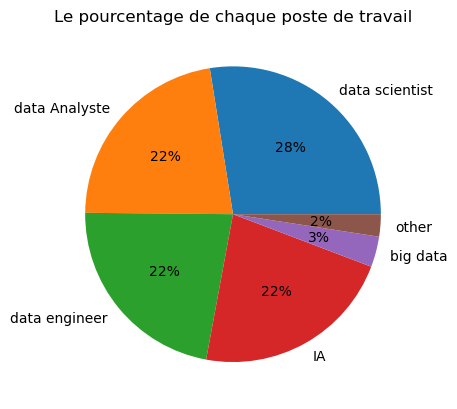

In [32]:
Total_job = Analyse_df['job role'].value_counts()

labels = Total_job.index
sizes = Total_job.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%')

# Add a title to the pie chart
ax.set_title('Le pourcentage de chaque poste de travail')

plt.show()

##### Top 10 Company :

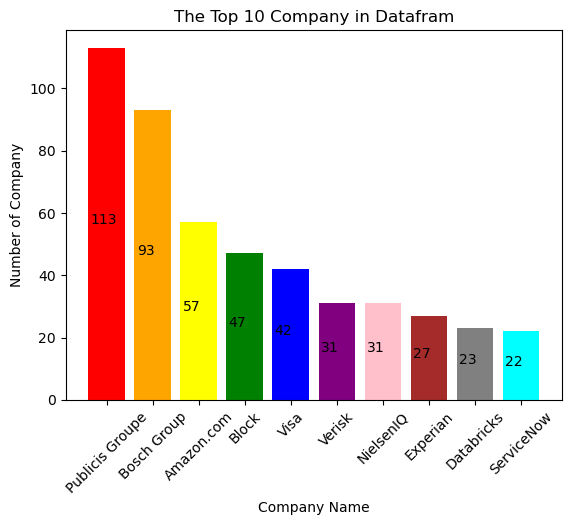

In [52]:
Top_company = Analyse_df['Company'].value_counts()[:10]

fig, ax = plt.subplots()
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown', 'gray', 'cyan']

# Create the bar chart with colors :

bars = ax.bar(Top_company.index, Top_company.values, color=colors)

# Add values to the bar chart

for i, v in enumerate(Top_company.values):
    ax.text(i - 0.35, v/2, str(v))


ax.set_ylabel('Number of Company')
ax.set_xlabel('Company Name')
ax.set_title('The Top 10 Company in Datafram')


plt.xticks(rotation=45)
plt.show()

## Country :

#####  Les 10 pays offrant l'emplois :

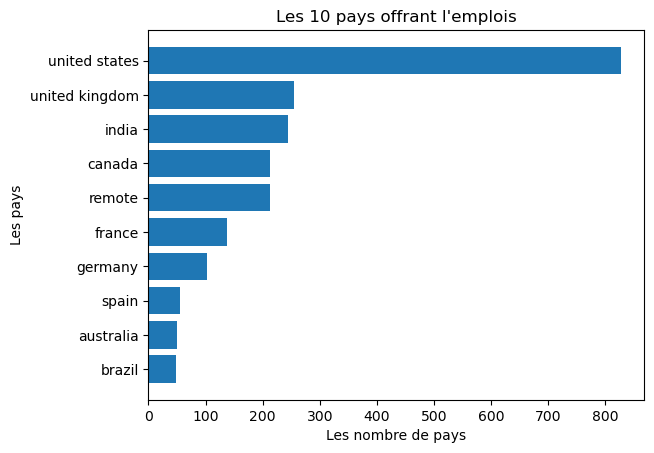

In [34]:
Top_Country = Analyse_df['Country'].value_counts()[:10]
Top_Country = Top_Country.sort_values(ascending=True)
Top_Country

# Sample data (replace with your actual data)
categories = Top_Country.index
values = Top_Country.values

# Create a figure and axis :
fig, ax = plt.subplots()

# Create the bar chart :
ax.barh(categories, values)

# Add labels and title :
ax.set_xlabel('Les nombre de pays')
ax.set_ylabel('Les pays')
ax.set_title('Les 10 pays offrant l\'emplois')

# Show the plot
plt.show()


##### Quels sont les postes de travail qui ont le plus grand nombre d'offres dans chaque pays :

In [35]:
filtered_df = Analyse_df[Analyse_df['Country'].isin(Top_Country.index)]

job_role_counts = filtered_df.groupby(['Country', 'job role']).size().reset_index(name='count')

countries = job_role_counts['Country'].unique
ai = job_role_counts[job_role_counts['job role'] == 'IA']
big_data = job_role_counts[job_role_counts['job role'] == 'big data']
data_analyste = job_role_counts[job_role_counts['job role'] == 'data Analyste']
data_engineer = job_role_counts[job_role_counts['job role'] == 'data engineer']
data_scientist = job_role_counts[job_role_counts['job role'] == 'data scientist']
job_role_counts


,Country,job role,count
0,australia,IA,14
1,australia,big data,2
2,australia,data Analyste,18
3,australia,data engineer,6
4,australia,data scientist,10
5,brazil,IA,15
6,brazil,big data,3
7,brazil,data Analyste,9
8,brazil,data engineer,7
9,brazil,data scientist,14


TypeError: unhashable type: 'numpy.ndarray'

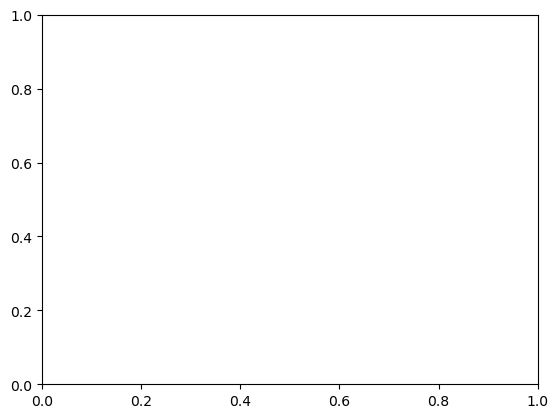

In [36]:
species = job_role_counts

penguin_means = {
    'ai' : ai,
    'big_data' : big_data,
    'data_Analyste' : data_analyste,
    'data_Engineer' : data_engineer,
    'data_Scientist' : data_scientist,
}

# create the bar chart for the  data  

fig, ax = plt.subplots()

ax.bar(species, penguin_means.values())

ax.set_xlabel('Species')

ax.set_ylabel('Number of Penguins')

ax.set_title('Number of Penguins by Species')

plt.show()

## Post de traveille  :

##### Number Experience level dans chaque post :

In [168]:
exp_level_counts = Analyse_df[Analyse_df['Experience level'] != 'No info'].groupby(['job role','Experience level']).size().reset_index(name='count')

exp_level_counts

,job role,Experience level,count
0,IA,Entry-level,74
1,IA,Executive-level,30
2,IA,Mid-level,93
3,IA,No info,45
4,IA,Senior-level,421
5,big data,Entry-level,16
6,big data,Executive-level,2
7,big data,Mid-level,14
8,big data,No info,8
9,big data,Senior-level,60


##### Quel est Le pourcentage d'offres d'emploi à distance par chaque Post :

In [ ]:
Analyse_df.head(1)

,Company,Job Title,Job Type,Experience level,Salary,Requirment of the company,Facilities,minimum_Salary,asterisk,Country,job role
0,SGS,clinical data analyst,Full Time,Entry-level,48K+ *,"[computer science, data quality, genetics, mat...",No Facilities,48000.0,True,united states,data Analyste


In [82]:
top_remote_post = Analyse_df[Analyse_df['Country'] == 'remote'][['job role','Country']].groupby('job role')['Country'].count()

top_remote_post = top_remote_post.sort_values(ascending=False)
top_remote_post


job role
IA                61
data scientist    56
data Analyste     47
data engineer     45
other              4
Name: Country, dtype: int64

## Salary :

#### le moyan salaire de chaque pay :

In [104]:
# country has count greater than  : 

country_counts = Analyse_df['Country'].value_counts()

countries_greater_than_3 = country_counts[country_counts > 10]

Filtered_df = Analyse_df[Analyse_df['Country'].isin(countries_greater_than_3.index)]

# get the average salary for each country  :
Filtered_df.groupby('Country')['minimum_Salary'].mean().nlargest(10)

Country
united states                    104464.328900
remote                            98585.915493
canada                            97840.375587
morocco                           97045.454545
ireland                           94263.157895
costa rica                        88894.736842
germany                           87519.215686
mexico                            86400.000000
holy see (vatican city state)     82888.888889
vietnam                           79166.666667
Name: minimum_Salary, dtype: float64

##### Moyane salaire dans chaque post :

In [112]:
Analyse_df.groupby('job role')['minimum_Salary'].mean()

job role
IA                86629.864253
big data          57830.000000
data Analyste     71694.469357
data engineer     96541.741742
data scientist    91777.985437
other             47027.397260
Name: minimum_Salary, dtype: float64

#### boit mostache de chaque job rools :

In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!!!!

#####  Les entreprises qui offrent les salaires les plus élevés :

In [113]:
Analyse_df.groupby('Company')['minimum_Salary'].mean().nlargest(5)

Company
Roblox             239812.5
Justworks, Inc.    235000.0
Credera            206500.0
Schonfeld          205000.0
DataStax           204000.0
Name: minimum_Salary, dtype: float64

##### Différence de salaire significative entre les différents pays pour les mêmes postes de travail :

##### Les postes de travail les plus salaire pour chaque niveau d'expérience :

## Job requirment :

##### Les top 5 Job requirment dans chaque post de traveille :

In [122]:
Analyse_df.head(1)

,Company,Job Title,Job Type,Experience level,Salary,Requirment of the company,Facilities,minimum_Salary,asterisk,Country,job role
0,SGS,clinical data analyst,Full Time,Entry-level,48K+ *,"[computer science, data quality, genetics, mat...",No Facilities,48000.0,True,united states,data Analyste


In [162]:
# get the each job role : 
job_requirment_ia = Analyse_df[Analyse_df['job role'] == 'IA']['Requirment of the company ']
job_requirment_big_data = Analyse_df[Analyse_df['job role'] == 'big data']['Requirment of the company ']
job_requirment_data_Analyste = Analyse_df[Analyse_df['job role'] == 'data Analyste']['Requirment of the company ']
job_requirment_data_engineer = Analyse_df[Analyse_df['job role'] == 'data engineer']['Requirment of the company ']
job_requirment_data_scientist = Analyse_df[Analyse_df['job role'] == 'data scientist']['Requirment of the company ']

# change the requirment column to list :
job_requirment_ia = [item for sublist in job_requirment_ia.tolist() for item in sublist]
job_requirment_big_data = [item for sublist in job_requirment_big_data.tolist() for item in sublist]
job_requirment_data_Analyste = [item for sublist in job_requirment_data_Analyste.tolist() for item in sublist]
job_requirment_data_engineer = [item for sublist in job_requirment_data_engineer.tolist() for item in sublist]
job_requirment_data_scientist = [item for sublist in job_requirment_data_scientist.tolist() for item in sublist]


def get_top_requirment(list_df) :
    # change to data frame :
    list_df = pd.Series(list_df)

    # delete values that are emtyed :
    list_df = list_df[list_df!= '']
    return list_df.value_counts().nlargest(10)

all_bar_graph = [get_top_requirment(job_requirment_ia),
get_top_requirment(job_requirment_big_data),
get_top_requirment(job_requirment_data_Analyste),
get_top_requirment(job_requirment_data_engineer),
get_top_requirment(job_requirment_data_scientist)]


# for i in all_bar_graph :
#     # create bar graph :
#     fig, ax = plt.subplots(1, 1, figsize=(10, 5))

#     ax.barh(all_bar_graph[0].index, all_bar_graph[0].values)

#     # add number in bar graph :

#     for i, v in enumerate(all_bar_graph[0].values):
#         ax.text(v + 1, i, str(v))
#     # order bar graph :

#     ax.invert_yaxis()

#     plt.show()
   
 

## Job Type :

##### Job Type dans chaque pay  :

In [165]:
df['Job Type']

job_type_by_country = Analyse_df.groupby(['Country','Job Type']).size().reset_index(name='count')

job_type_by_country

,Country,Job Type,count
0,albania,Full Time,2
1,argentina,Full Time,6
2,armenia,Full Time,2
3,asia,Full Time,1
4,australia,Full Time,48
...,...,...,...
120,venezuela,Internship,1
121,vietnam,Full Time,11
122,vietnam,Internship,1
123,zambia,Full Time,1


In [ ]:
Analyse_df.groupby('Company')['minimum_Salary'].mean().nlargest(5)

##### Job Type dans chaque post  :

## Facilities :

##### Les Facilities les plus couramment offerts par les post :

##### Les Facilities les plus couramment offerts par les company :

##### Les Facilities les plus couramment offerts par pay:

### Job Type	

## Insert into Db :

In [ ]:
import pyodbc 

In [ ]:
# Créer un connexion dans le database :

driver = 'SQL Server'
server = 'LAPTOP-6D8J0VI4\SQLEXPRESS'
database = 'github_DB'

conn = pyodbc.connect(f'''
                        DRIVER={driver};
                        SERVER={server};
                        DATABASE={database};
                        Trusted_Connection=yes
                       ''')
cursor = conn.cursor()
conn

NameError: name 'pyodbc' is not defined